In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [3]:
# converting it in numerical data - # Countvectorizer, TFIDF

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
import warnings

warnings.filterwarnings('ignore')


In [5]:
amazon = pd.read_csv('Amazon_Review_CleanData.csv')

amazon.head()

title  rating  \
0                Unreliable earphones with high cost     1.0   
1                Honest review of an edm music lover     3.0   
2                           Really good and durable.     4.0   
3  A good earphone but with some issues, read thi...     4.0   
4                          Charging port not working     1.0   

                                                body  \
0  This  earphones are unreliable, i bought it be...   
1  No doubt it has a great bass and to a great ex...   
2  i bought itfor 999,I purchased it second time,...   
3  I'll get straight to the pros and cons of Boat...   
4  After 11 days, the charging port isn't working...   

                                        clean_review  
0  earphone unreliable bought day meanwhile right...  
1  doubt great bass great extent noise cancellati...  
2  bought itfor purchased second time gifted firs...  
3  get straight pro con boat rockerz pro bluetoot...  
4  day charging port working even return wat know...

In [7]:
amazon['clean_review'] = amazon['clean_review'].apply(lambda x: str(x))

In [9]:
amazon['clean_review'].dtype

dtype('O')

## Word Cloud

In [10]:
# gettinf string

amazon_clean_review_string = ' '.join(list(amazon['clean_review']))

In [11]:
def plot_cloud(wordcloud):
    
    plt.figure(figsize=(40,30))
    
    plt.imshow(wordcloud)
    
    plt.axis('off')

In [13]:
wordcloud = WordCloud(height=2000,width=3000,max_words=150,stopwords=STOPWORDS,background_color='black',colormap='Set2').generate(amazon_clean_review_string)

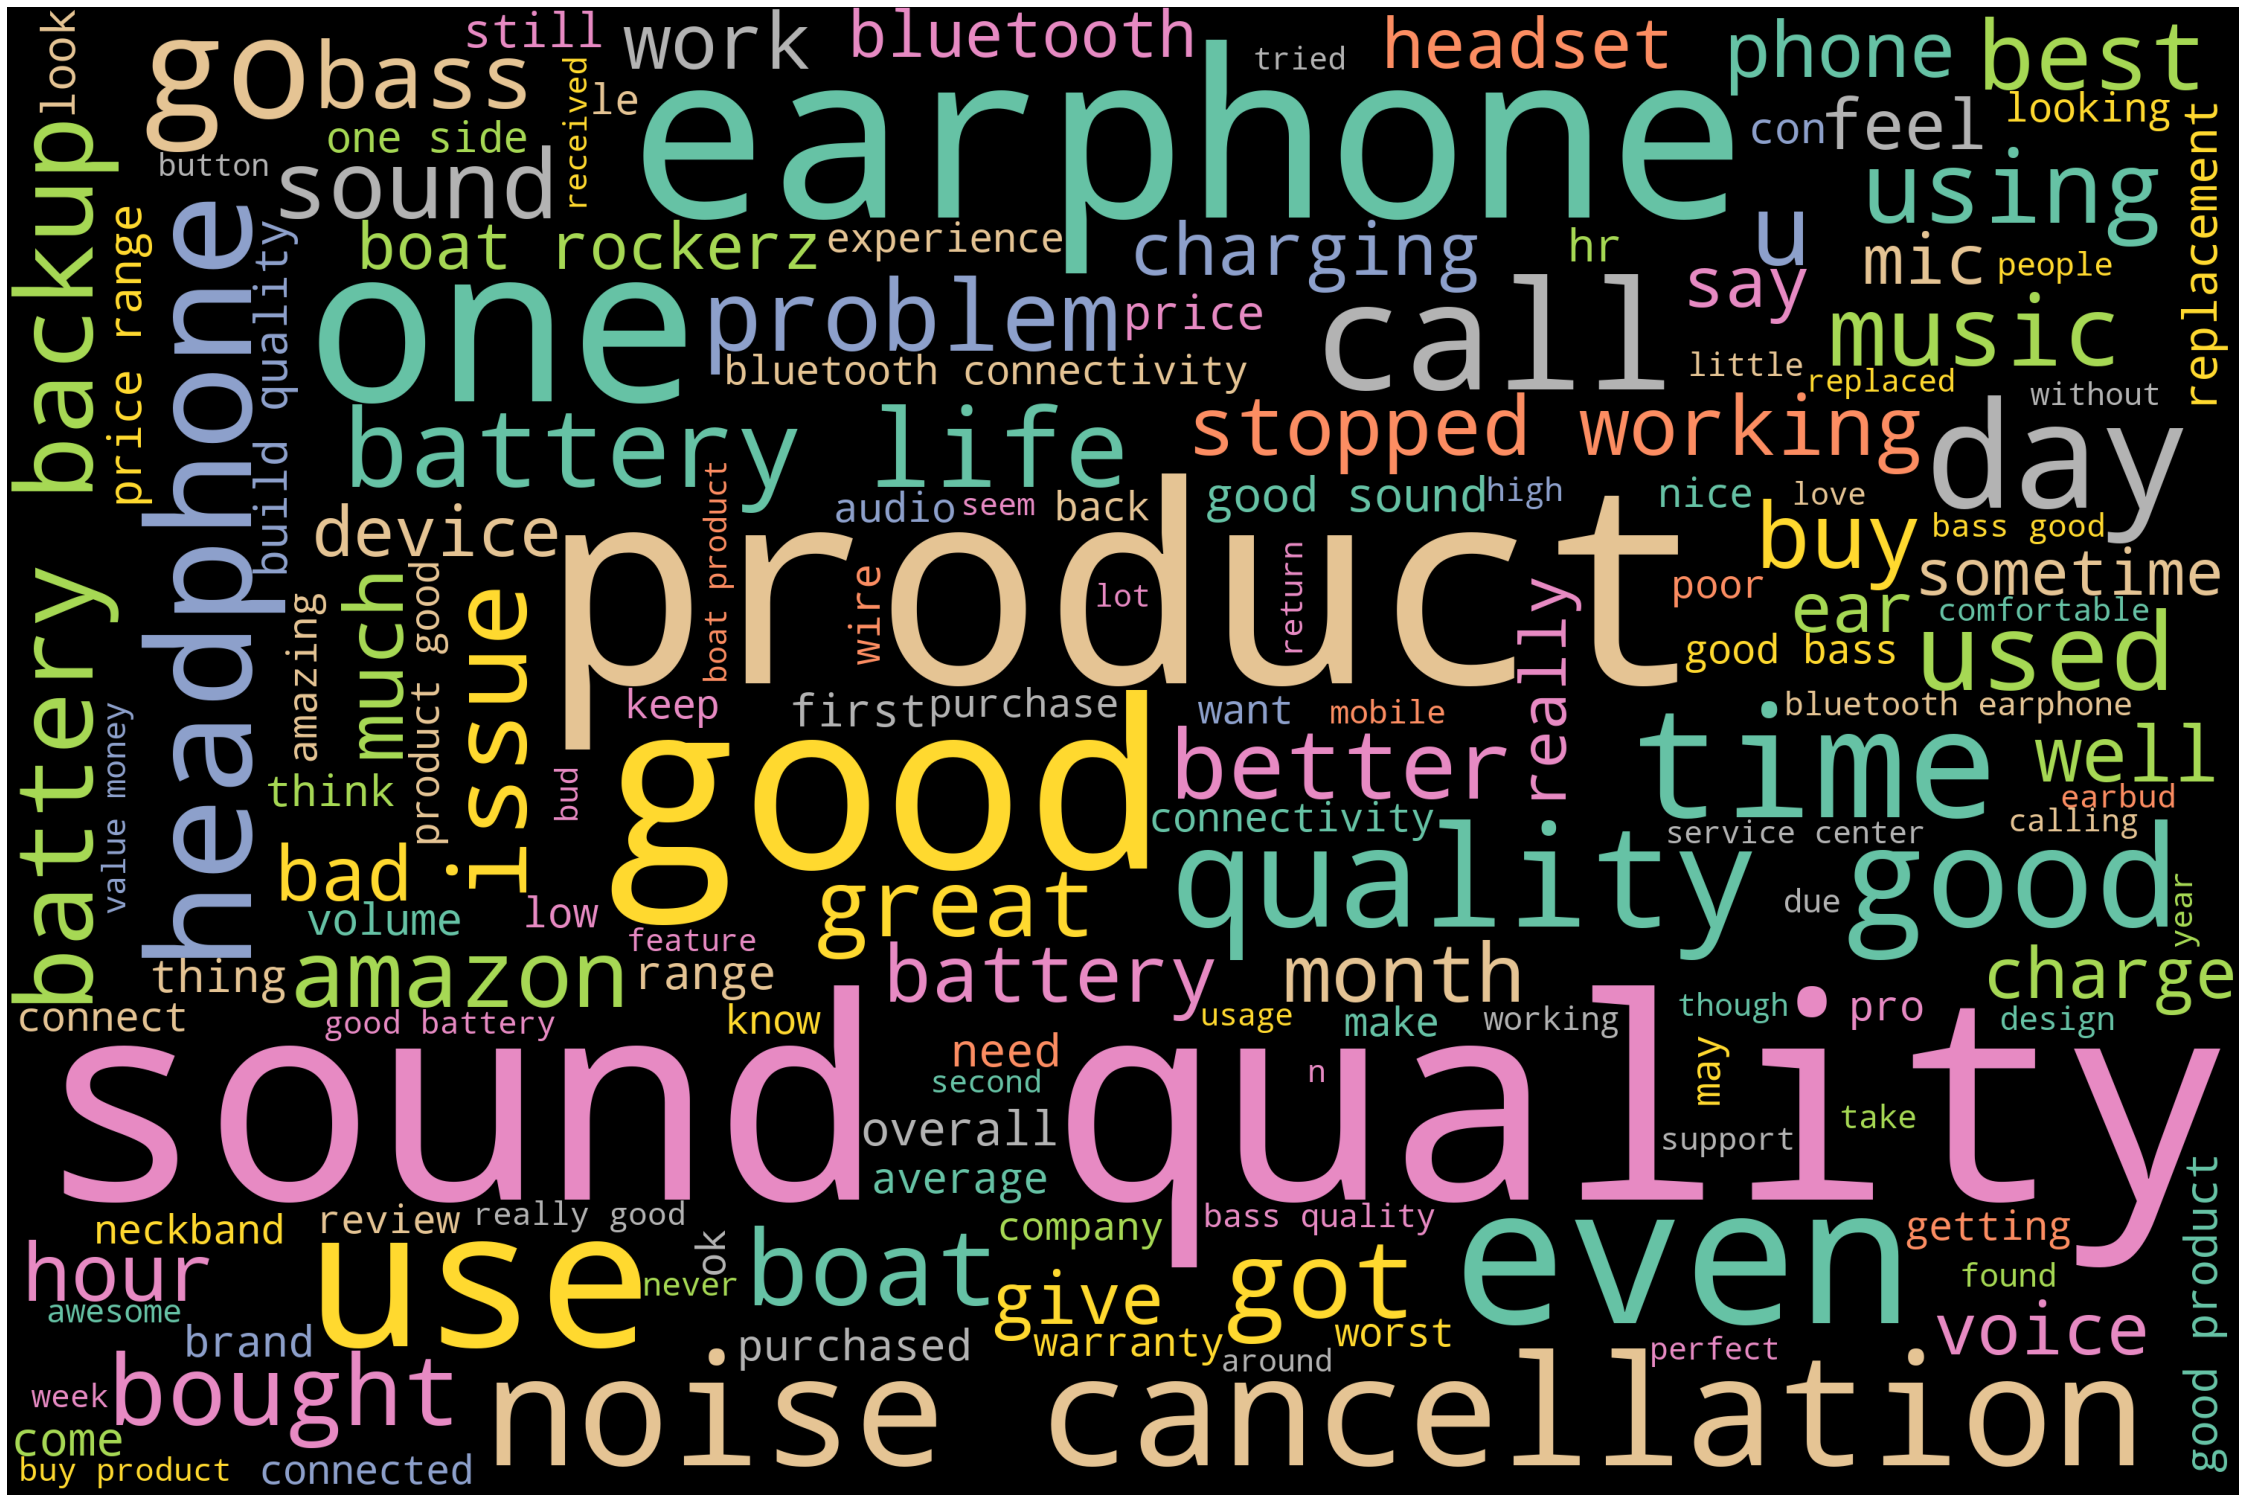

In [14]:
plot_cloud(wordcloud)

In [25]:
def plot_wordcloud(words,Title):
    
    word_cloud = WordCloud(width=3000,height=2000, max_words=150, background_color='black',stopwords=STOPWORDS,colormap='Set2',).generate(str(words))
    
    plt.figure(figsize=(40,30))
    
    plt.imshow(word_cloud)
    
    plt.title(Title, size = 75)
    
    plt.axis('off')

In [15]:
with open('positive-words.txt','r') as p:
    
    positive_words = p.read().split('\n')

In [16]:
with open('negative-words.txt','r') as n:
    
    negative_words = n.read().split('\n')

In [18]:
total_words = amazon_clean_review_string.split()

In [19]:
positive_cloud = [word for word in total_words if word in positive_words ]

In [20]:
len(positive_cloud)

18667

In [21]:
negative_cloud = [word for word in total_words if word in negative_words ]

In [22]:
len(negative_cloud)

10536

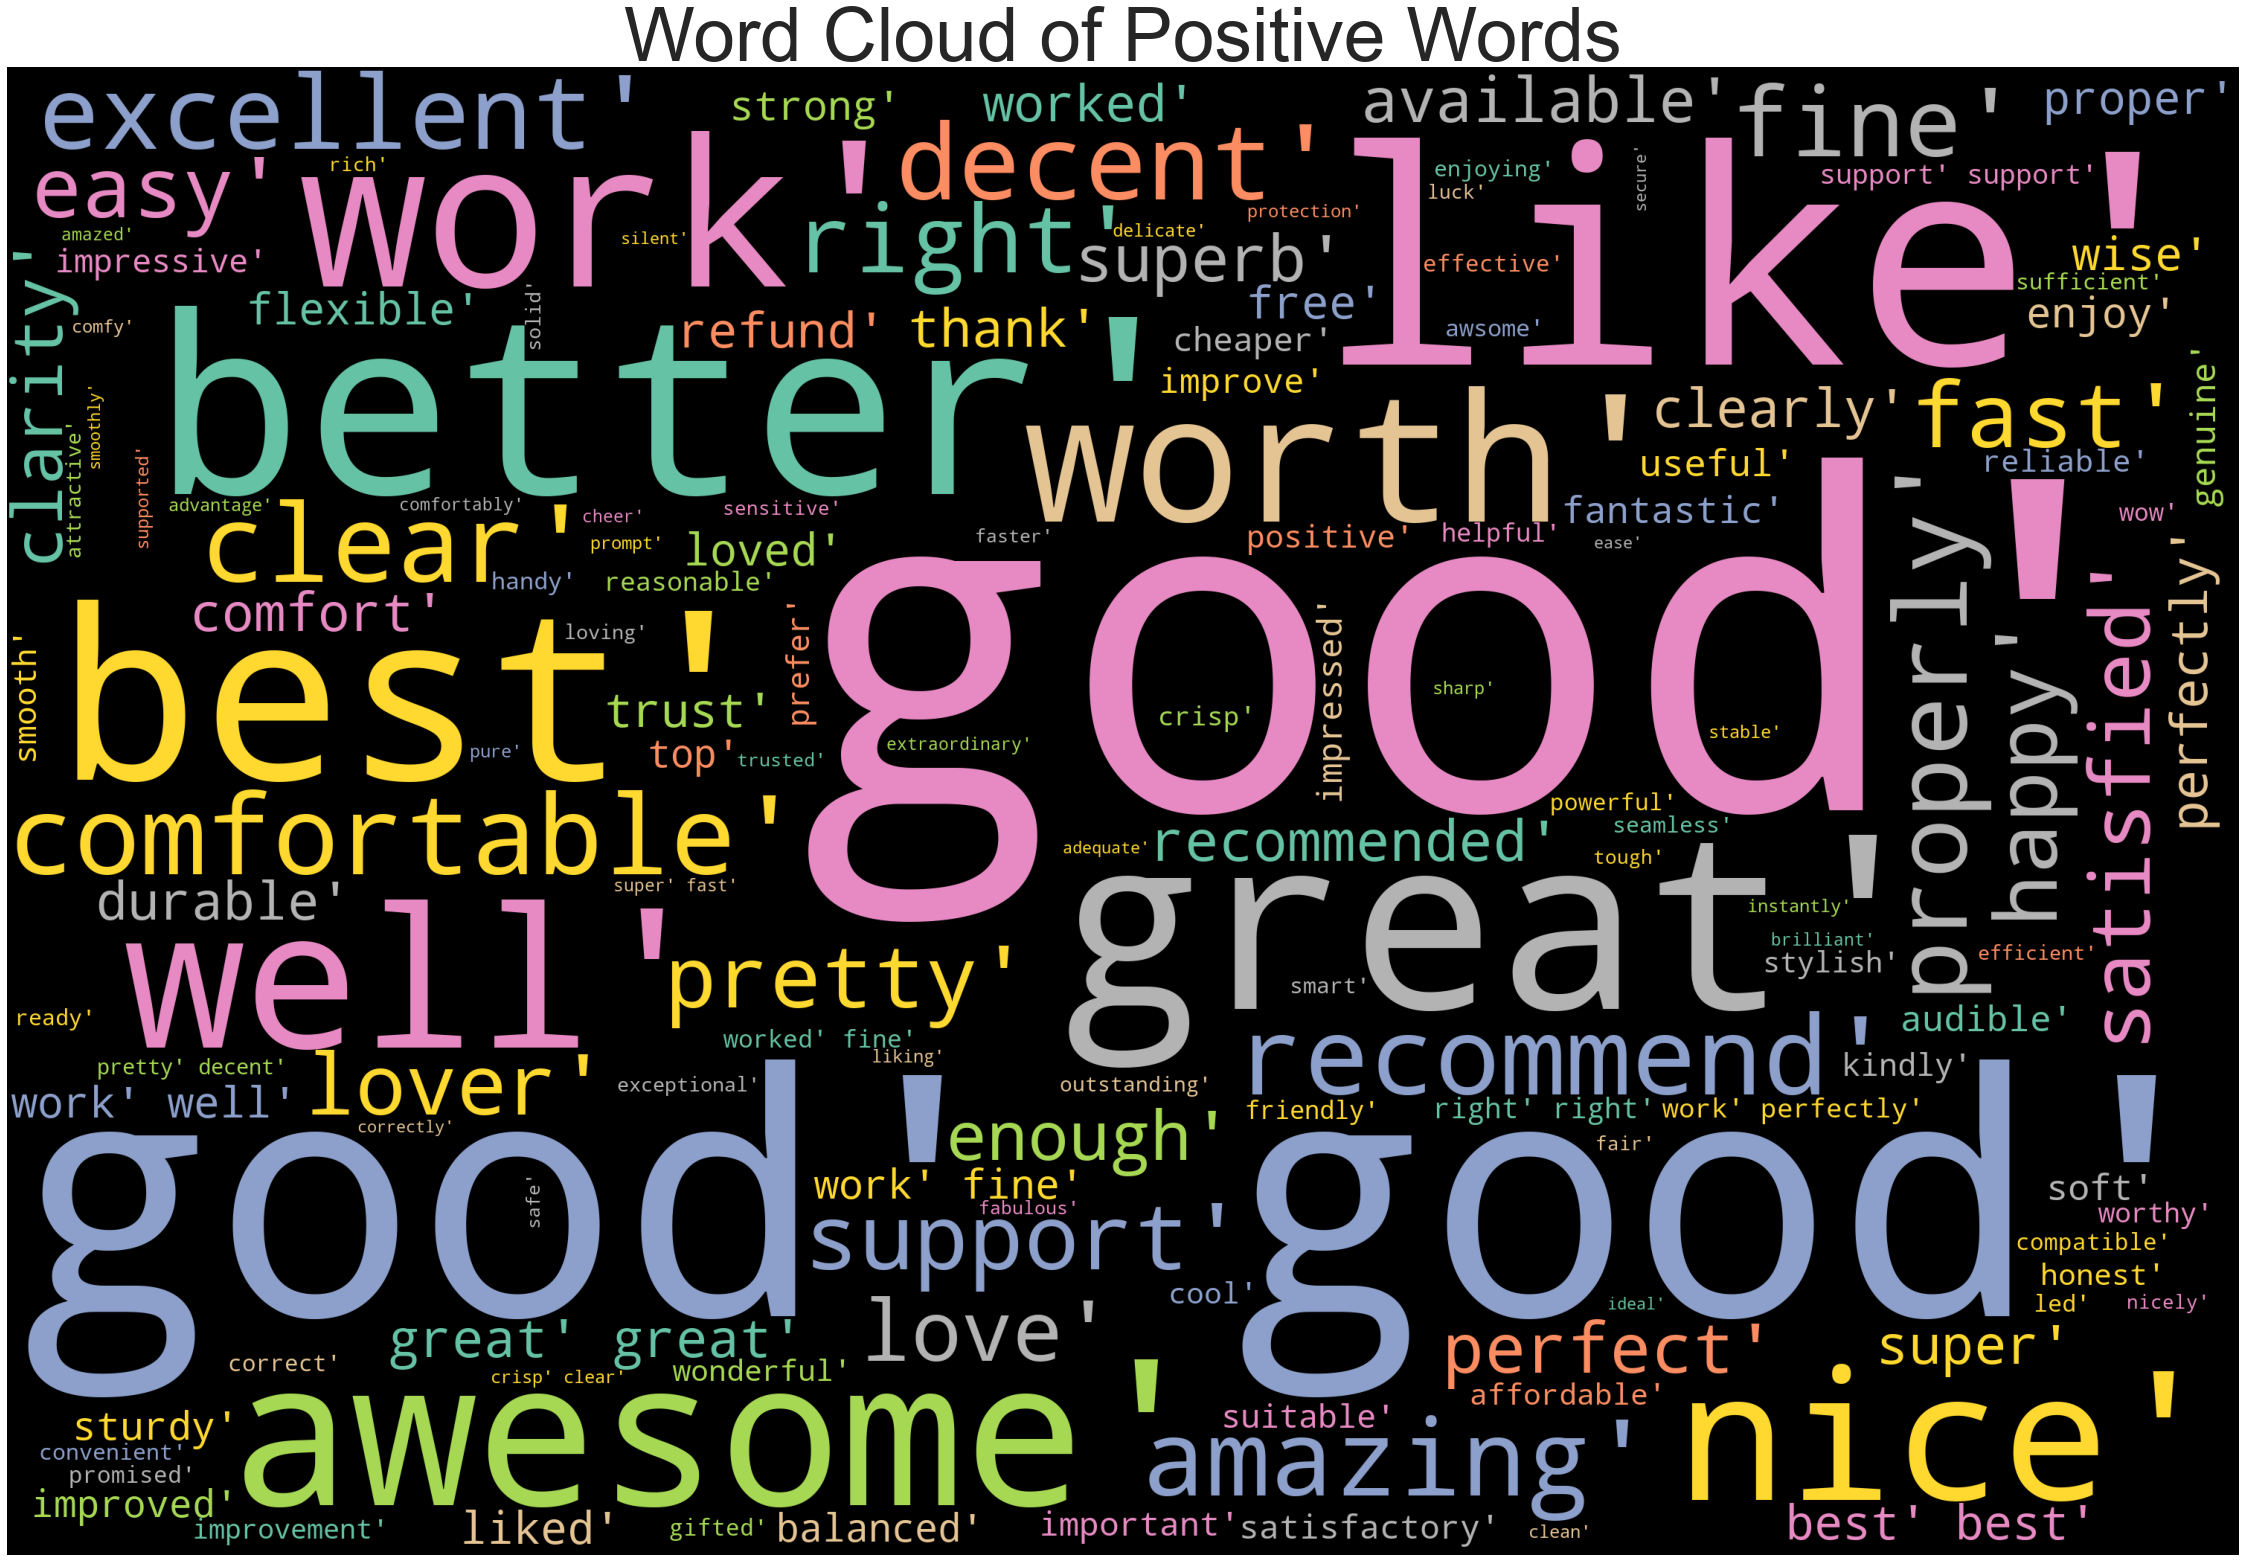

In [26]:
plot_wordcloud(positive_cloud,'Word Cloud of Positive Words')

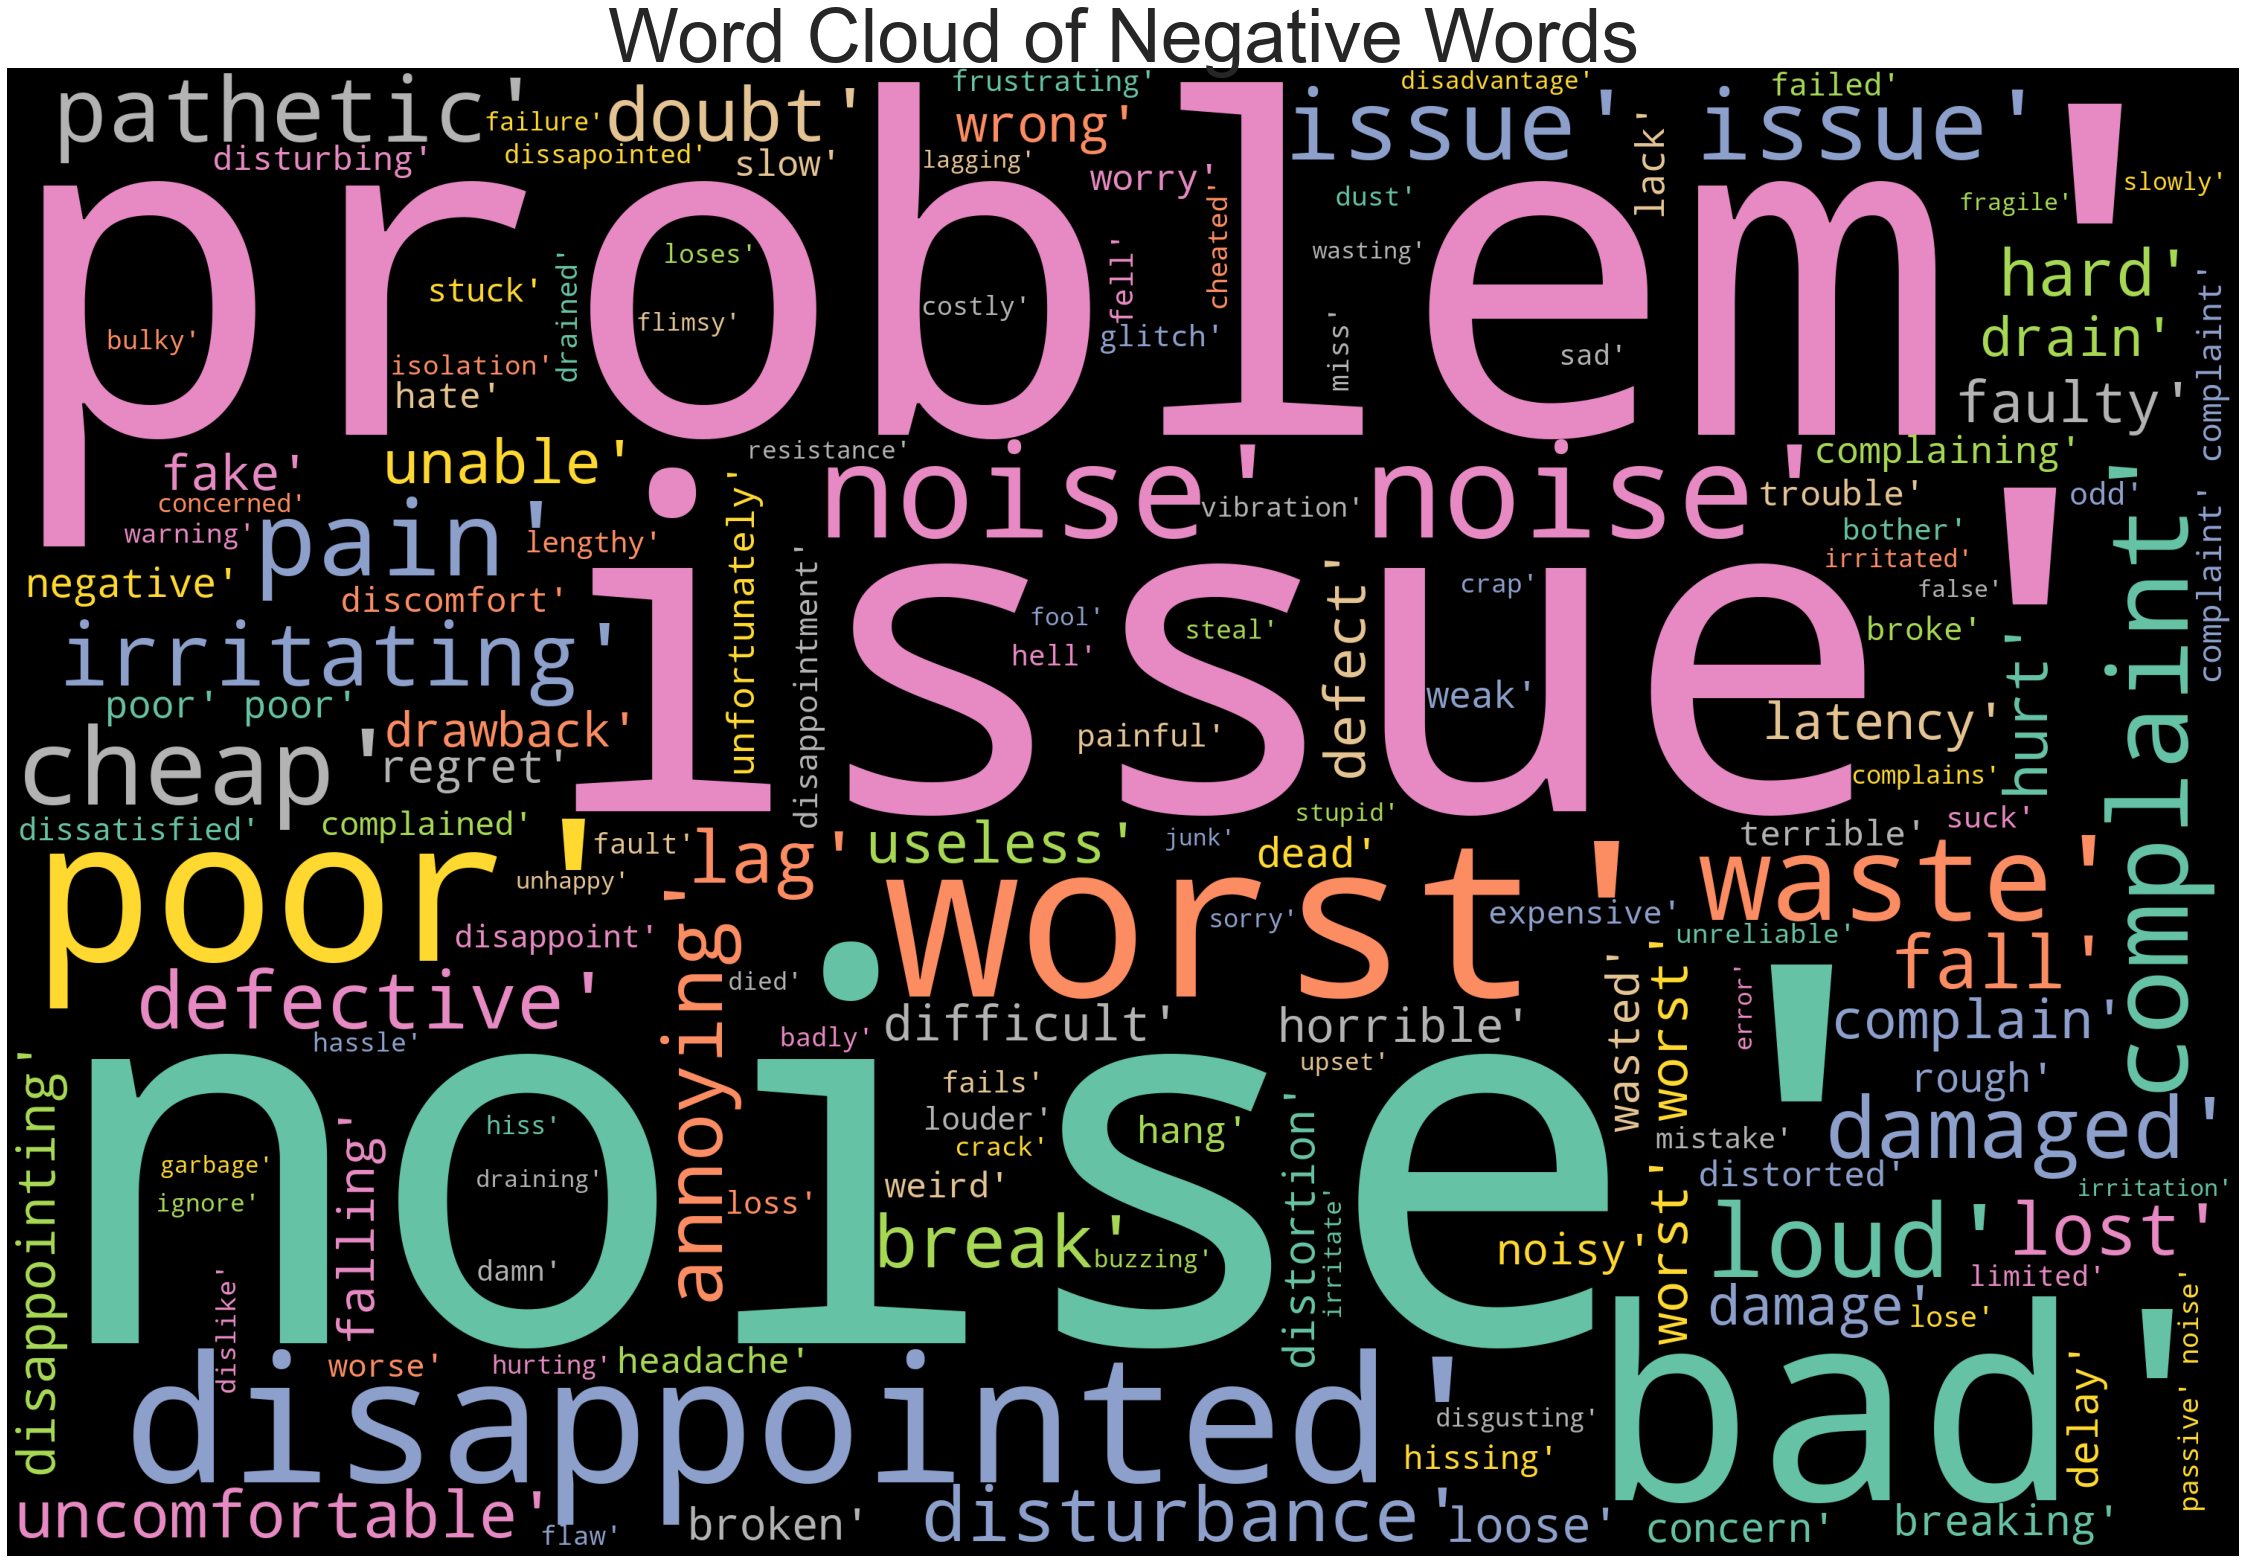

In [27]:
plot_wordcloud(negative_cloud,'Word Cloud of Negative Words')

## Word Frequency - N Gram, Bi Gram, Tri Gram

In [28]:
def bi_gram(corpus, n = None): 
    vect = CountVectorizer(ngram_range=(2,2), max_features= 2000)

    model = vect.fit_transform(corpus)

    word_sum = model.sum(axis = 0)

    word_freq = [(word,word_sum[0,idx]) for word,idx in vect.vocabulary_.items()]

    word_freq = sorted(word_freq, key= lambda x : x[1], reverse= True)
    
    return word_freq[:n]


In [30]:
bigram = bi_gram(amazon['clean_review'],200)

bigram_df = pd.DataFrame(bigram, columns=['Bi_Gram', 'Frequency'])

bigram_df.head(50)

Bi_Gram  Frequency
0            sound quality       1838
1       noise cancellation        766
2             quality good        634
3             battery life        594
4           battery backup        569
5          stopped working        401
6             boat rockerz        301
7               good sound        279
8              price range        267
9            build quality        261
10            good product        243
11               also good        236
12                one side        226
13  bluetooth connectivity        213
14               good bass        201
15      bluetooth earphone        185
16            product good        182
17            bass quality        182
18             value money        179
19               bass good        168
20            good battery        162
21             really good        160
22             buy product        158
23          service center        155
24           customer care        143
25            good quality        141
26            boat product        138
27         listening music        133
28           quality sound        133
29            quality also        132
30                 ear bud        128
31             waste money        125
32        customer service        122
33         quality product        119
34             rockerz pro        118
35            call quality        115
36            quality bass        115
37       wireless earphone        113
38            overall good        111
39             using month        110
40            battery back        108
41              sound good        107
42          writing review        107
43             boat rocker        106
44           built quality        104
45       cancellation good        104
46         bluetooth range        103
47       bluetooth headset        102
48              sound bass        101
49               month use        100

In [34]:
top_20 = bigram_df.iloc[:20,:]

[Text(0, 0, 'sound quality'),
 Text(1, 0, 'noise cancellation'),
 Text(2, 0, 'quality good'),
 Text(3, 0, 'battery life'),
 Text(4, 0, 'battery backup'),
 Text(5, 0, 'stopped working'),
 Text(6, 0, 'boat rockerz'),
 Text(7, 0, 'good sound'),
 Text(8, 0, 'price range'),
 Text(9, 0, 'build quality'),
 Text(10, 0, 'good product'),
 Text(11, 0, 'also good'),
 Text(12, 0, 'one side'),
 Text(13, 0, 'bluetooth connectivity'),
 Text(14, 0, 'good bass'),
 Text(15, 0, 'bluetooth earphone'),
 Text(16, 0, 'product good'),
 Text(17, 0, 'bass quality'),
 Text(18, 0, 'value money'),
 Text(19, 0, 'bass good')]

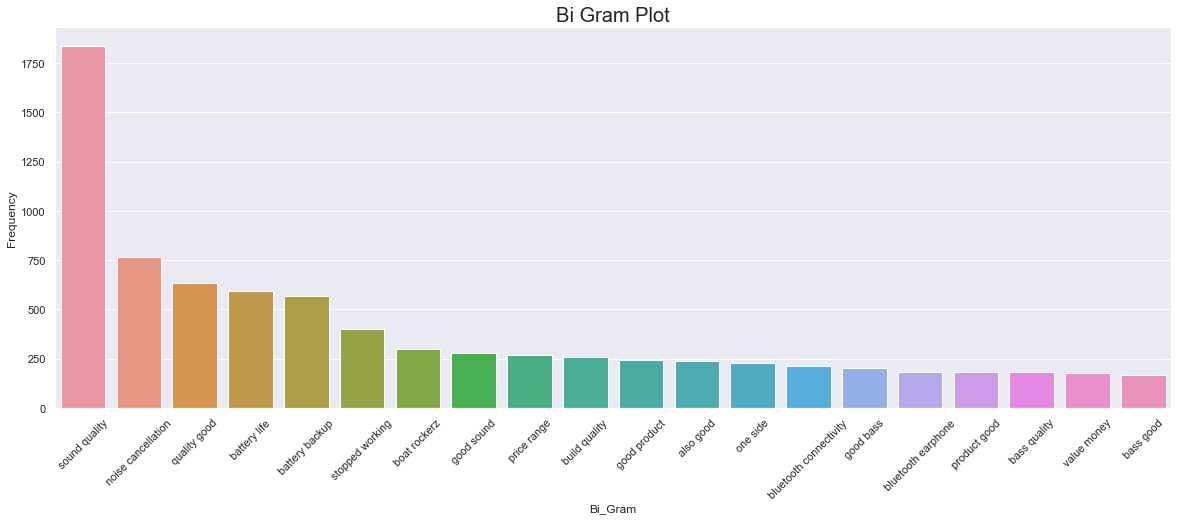

In [36]:
plt.figure(figsize=(20,7))

PLOT = sns.barplot(x = 'Bi_Gram',y = "Frequency", data = top_20)

plt.title('Bi Gram Plot', size = 20)

PLOT.set_xticklabels(rotation = 45, labels = top_20['Bi_Gram'] )

In [37]:
def tri_gram(corpus, n = None): 
    vect = CountVectorizer(ngram_range=(3,3), max_features= 2000)

    model = vect.fit_transform(corpus)

    word_sum = model.sum(axis = 0)

    word_freq = [(word,word_sum[0,idx]) for word,idx in vect.vocabulary_.items()]

    word_freq = sorted(word_freq, key= lambda x : x[1], reverse= True)
    
    return word_freq[:n]

In [38]:
trigram = tri_gram(amazon['clean_review'],200)

trigram_df = pd.DataFrame(trigram, columns=['Tri_Gram', 'Frequency'])

trigram_df.head(50)

Tri_Gram  Frequency
0            sound quality good        391
1            good sound quality        180
2            sound quality bass         93
3       noise cancellation good         89
4              boat rockerz pro         88
5           battery backup good         76
6    quality noise cancellation         74
7           medium could loaded         71
8           sound quality noise         69
9       good noise cancellation         67
10            good battery life         66
11            battery life good         64
12           sound quality also         60
13     earphone stopped working         57
14          sound quality great         57
15            quality good bass         55
16          good battery backup         54
17        stopped working month         54
18               month one side         53
19        sound quality awesome         50
20            quality also good         50
21         side stopped working         49
22           bass sound quality         49
23            one side earphone         47
24           build quality good         44
25             one side working         43
26        product sound quality         40
27  bluetooth connectivity good         39
28        sound quality average         38
29         overall good product         37
30       stopped working within         36
31         writing review using         36
32            battery life also         35
33          great sound quality         35
34             one side stopped         34
35        sound quality battery         32
36      noise cancellation also         32
37          product price range         32
38      noise cancellation bass         31
39         quality good battery         30
40           good build quality         29
41             buy boat product         29
42         better sound quality         29
43             good price range         28
44           good quality sound         27
45            pro sound quality         26
46         working within month         26
47          battery backup also         26
48       earphone sound quality         26
49         sound quality really         25

In [39]:
top_20_tri = trigram_df.iloc[:20,:]

[Text(0, 0, 'sound quality good'),
 Text(1, 0, 'good sound quality'),
 Text(2, 0, 'sound quality bass'),
 Text(3, 0, 'noise cancellation good'),
 Text(4, 0, 'boat rockerz pro'),
 Text(5, 0, 'battery backup good'),
 Text(6, 0, 'quality noise cancellation'),
 Text(7, 0, 'medium could loaded'),
 Text(8, 0, 'sound quality noise'),
 Text(9, 0, 'good noise cancellation'),
 Text(10, 0, 'good battery life'),
 Text(11, 0, 'battery life good'),
 Text(12, 0, 'sound quality also'),
 Text(13, 0, 'earphone stopped working'),
 Text(14, 0, 'sound quality great'),
 Text(15, 0, 'quality good bass'),
 Text(16, 0, 'good battery backup'),
 Text(17, 0, 'stopped working month'),
 Text(18, 0, 'month one side'),
 Text(19, 0, 'sound quality awesome')]

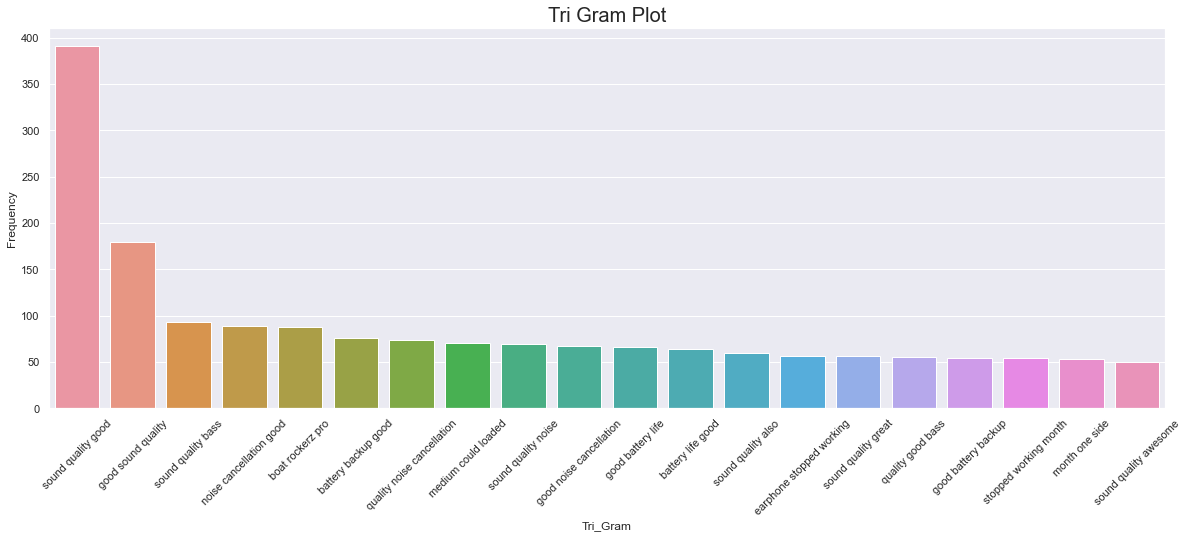

In [40]:
plt.figure(figsize=(20,7))

Plot = sns.barplot(x = 'Tri_Gram', y = 'Frequency', data = top_20_tri)

plt.title('Tri Gram Plot', size = 20)
          
Plot.set_xticklabels(rotation = 45, labels = top_20_tri['Tri_Gram'])